### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### loding data into data frame

In [2]:
df = pd.read_csv('C:/Users/HIMANSHU/Desktop/Data Analyst Bootcamp/Assignments/PROJECT PORTFOLIO/Starbucks/Starbucks.csv')
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


### Cleaning the data

In [3]:
# Total fat column.

df.loc[df[' Total Fat (g)'] == '3 2', ' Total Fat (g)'] = '3.2'

In [4]:
df[' Total Fat (g)'] = df[' Total Fat (g)'].astype(float)

In [5]:
# for Caffeine (mg) column

In [6]:
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce')

value_to_replace = 'Varies'
column_name = 'Caffeine (mg)'

mean_value = df.loc[df[column_name] != value_to_replace, column_name].mean()
df.loc[df[column_name] == value_to_replace, column_name] = mean_value

In [7]:
column_name = 'Caffeine (mg)'
df[column_name].fillna(0, inplace=True)
unique_values = df[column_name].unique()
print(unique_values)

[175.   260.   330.   410.    75.   150.    85.    95.   180.   225.
 300.    10.    20.    25.    30.     0.    50.    70.   120.    55.
  80.   110.   165.   235.    90.     1.25 125.   170.    15.   130.
 140.   100.   145.    65.   105.  ]


### Starting our Analysis

#### 1. Nutritional Comparison

### Q. Which beverage categories have the highest and lowest average calorie content?

In [8]:
avg_calories_per_category = df.groupby('Beverage_category')['Calories'].mean()

# Sorting to find categories with highest and lowest average calorie content
highest_avg_calories_category = avg_calories_per_category.idxmax()
lowest_avg_calories_category = avg_calories_per_category.idxmin()

# Displaying the results
print(f"The category with the highest average calorie content is: {highest_avg_calories_category}")
print(f"The category with the lowest average calorie content is: {lowest_avg_calories_category}")

The category with the highest average calorie content is: Smoothies
The category with the lowest average calorie content is: Coffee


#### Q. What is the distribution of total fat, saturated fat, and cholesterol across different beverage categories?

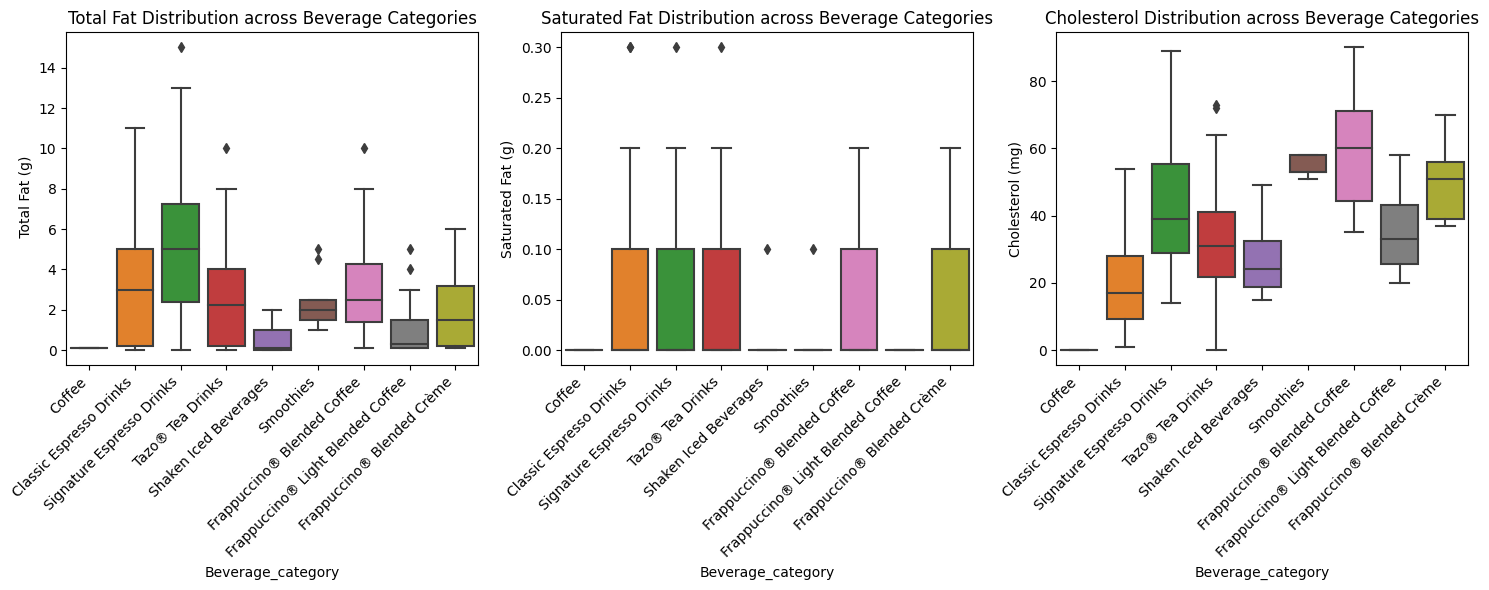

In [9]:
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

# Box plot for Total Fat
plt.subplot(1, 3, 1)
sns.boxplot(x='Beverage_category', y=' Total Fat (g)', data=df)
plt.title('Total Fat Distribution across Beverage Categories')
plt.xticks(rotation=45, ha='right')  # Tilted xtick labels

# Box plot for Saturated Fat
plt.subplot(1, 3, 2)
sns.boxplot(x='Beverage_category', y='Saturated Fat (g)', data=df)
plt.title('Saturated Fat Distribution across Beverage Categories')
plt.xticks(rotation=45, ha='right')  # Tilted xtick labels

# Box plot for Cholesterol
plt.subplot(1, 3, 3)
sns.boxplot(x='Beverage_category', y='Cholesterol (mg)', data=df)
plt.title('Cholesterol Distribution across Beverage Categories')
plt.xticks(rotation=45, ha='right')  # Tilted xtick labels

plt.tight_layout()
plt.show()

--
1. Beverage category vs Total Fat
-- coffee has 0 fat. Maximum amount of Fat is in Signature Espresso Drinks
2. Beverage category vs Saturated Fat
-- coffee, iced Beverages, smoothies and Light blend coffee they don't have saturated fats except some outliers.
-- Classic Espresso Drinks, Signature esp drinks, Tazo Tea drinks, Frappuccino blended coffee and Frappuccino blended Creme they alomost have same amount of Saturated Fat.
3. Beverage category vs Cholesterol
-- Signature esp drinks , smoothies and Frappuccino blended coffee have the highest amount of cholesterol. Coffee don't have the Cholesterol at all.


## 2. Impact of Preparation Methods

### Q. How do different beverage preparation methods affect caffeine content?

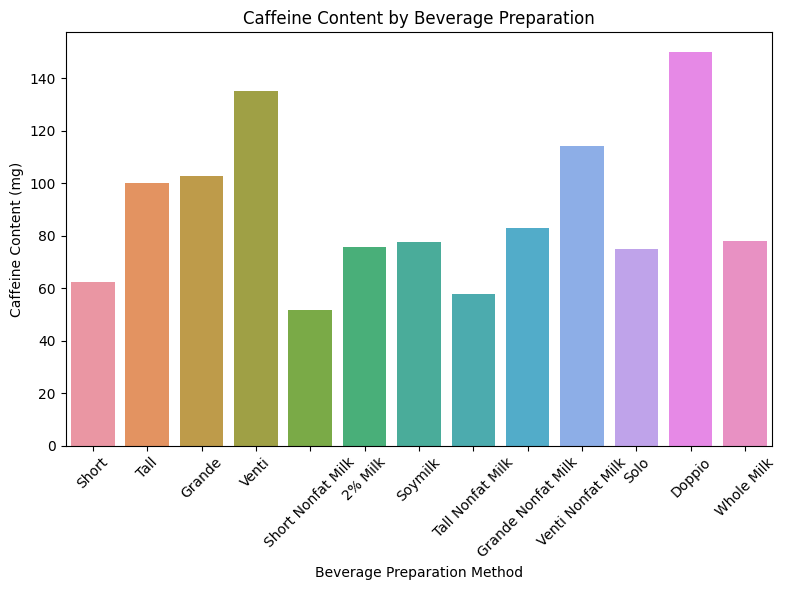

In [10]:
plt.figure(figsize=(8, 6))

sns.barplot(x='Beverage_prep', y='Caffeine (mg)', data=df, errorbar=None)
plt.title('Caffeine Content by Beverage Preparation')
plt.xlabel('Beverage Preparation Method')
plt.ylabel('Caffeine Content (mg)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

### Q. Is there a notable difference in the nutritional content (calories, sugars, etc.) between beverage preparations?

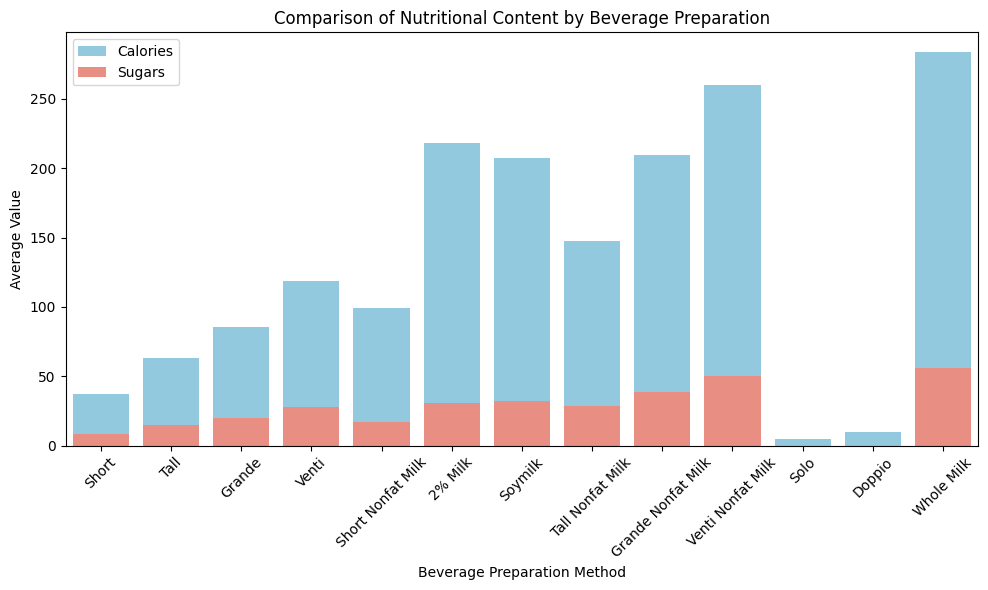

In [11]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Beverage_prep', y='Calories', data=df, errorbar=None, label='Calories', color='skyblue')
sns.barplot(x='Beverage_prep', y='Sugars (g)', data=df, errorbar=None, label='Sugars', color='salmon')

plt.title('Comparison of Nutritional Content by Beverage Preparation')
plt.xlabel('Beverage Preparation Method')
plt.ylabel('Average Value')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Vitamins and Minerals


### Q. Which nutrients demonstrate the most notable variations in average percentages across different Starbucks beverage categories?

In [14]:
percentage_columns = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
df[percentage_columns] = df[percentage_columns].replace({'%': ''}, regex=True).astype(float)

# Calculate average percentage for each beverage category
average_percentages = df.groupby('Beverage_category')[percentage_columns].mean()

In [15]:
# Display average percentages by beverage categories
print(average_percentages)


                                   Vitamin A (% DV)  Vitamin C (% DV)  \
Beverage_category                                                       
Classic Espresso Drinks                   12.724138          0.206897   
Coffee                                     0.000000          0.000000   
Frappuccino® Blended Coffee                5.500000          0.000000   
Frappuccino® Blended Crème                 6.153846          4.615385   
Frappuccino® Light Blended Coffee          6.000000          0.000000   
Shaken Iced Beverages                      1.777778          2.500000   
Signature Espresso Drinks                 13.150000          0.750000   
Smoothies                                 20.444444         65.000000   
Tazo® Tea Drinks                          10.557692          2.903846   

                                   Calcium (% DV)  Iron (% DV)  
Beverage_category                                               
Classic Espresso Drinks                 27.344828     8.103448  
C

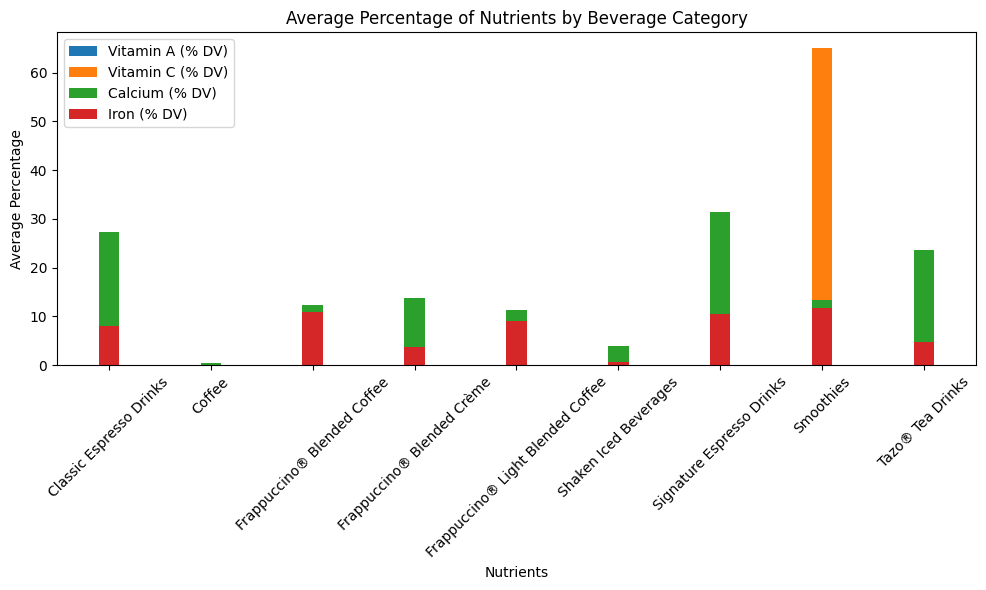

In [17]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Iterate through columns and create a grouped bar plot
for i, nutrient in enumerate(average_percentages.columns):
    plt.bar(
        range(len(average_percentages)),  # X positions for bars
        average_percentages[nutrient],
        width=0.2,
        label=nutrient
    )

plt.xlabel('Nutrients')
plt.ylabel('Average Percentage')
plt.title('Average Percentage of Nutrients by Beverage Category')
plt.xticks(range(len(average_percentages)), average_percentages.index, rotation=45)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

## 4. Overall Trends and Correlations:


### Q. Is there any correlation between calorie content and other nutritional components like fats, sugars, or protein?

In [23]:

nutritional_components = ['Calories', ' Total Fat (g)', 'Sugars (g)', 'Protein (g)']
selected_data = df[nutritional_components]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                Calories   Total Fat (g)  Sugars (g)  Protein (g)
Calories        1.000000        0.632785    0.909675     0.578453
 Total Fat (g)  0.632785        1.000000    0.330443     0.550480
Sugars (g)      0.909675        0.330443    1.000000     0.263061
Protein (g)     0.578453        0.550480    0.263061     1.000000


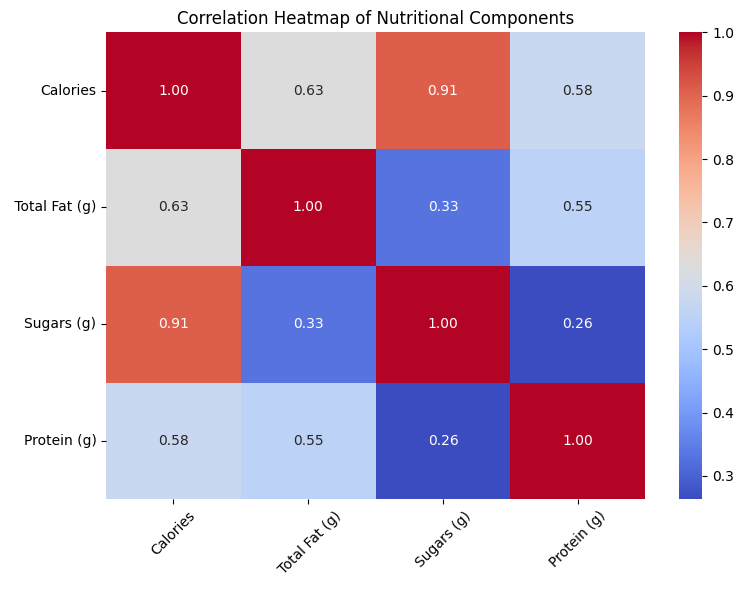

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap of Nutritional Components')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()